<a href="https://colab.research.google.com/github/pritkudale/Code_for_LinkedIn/blob/main/Linear_vs_Logistic_Regression_Animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

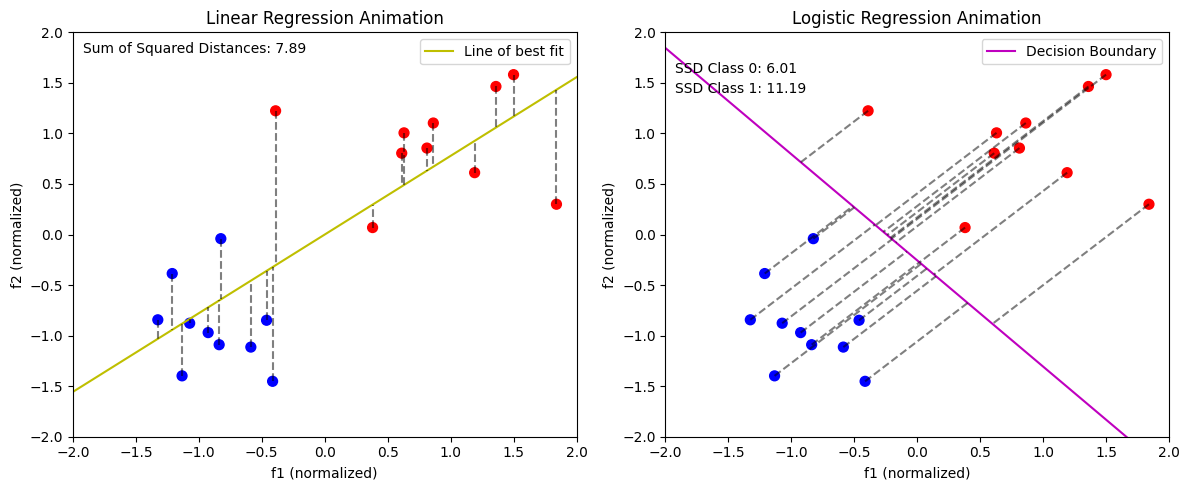

In [1]:
# prompt: In the above animation, add the value of the sum of squared distances separately for each class in logistic regression. Give the entire code once again.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, LogisticRegression


# Generate synthetic data
np.random.seed(0)
class_1 = np.random.multivariate_normal([2, 3], [[0.8, 0], [0, 0.8]], 10)
class_2 = np.random.multivariate_normal([6, 7], [[0.8, 0], [0, 0.8]], 10)

data = np.vstack([class_1, class_2])
labels = np.array([0] * len(class_1) + [1] * len(class_2))

# Normalize data
data_mean = np.mean(data, axis=0)
data_std = np.std(data, axis=0)
data = (data - data_mean) / data_std

# Gradient Descent for Linear Regression
def gradient_descent_linear(data, labels, lr=0.1, epochs=100):
    m, b = np.random.rand(), np.random.rand()  # Random initialization
    n = len(data)
    m_vals, b_vals = [m], [b]  # For tracking the evolution
    for _ in range(epochs):
        predictions = m * data[:, 0] + b
        error = predictions - data[:, 1]
        m_grad = (2/n) * np.sum(error * data[:, 0])
        b_grad = (2/n) * np.sum(error)
        m -= lr * m_grad
        b -= lr * b_grad
        m_vals.append(m)
        b_vals.append(b)
    return m, b, m_vals, b_vals

# Gradient Descent for Logistic Regression
def sigmoid(z):
    return np.clip(1 / (1 + np.exp(-z)), 1e-7, 1 - 1e-7)  # Prevent overflow

def gradient_descent_logistic(data, labels, lr=0.1, epochs=100):
    weights = np.random.rand(data.shape[1])
    bias = np.random.rand()
    weight_vals, bias_vals = [weights.copy()], [bias]  # For tracking
    for _ in range(epochs):
        linear_model = np.dot(data, weights) + bias
        predictions = sigmoid(linear_model)
        error = predictions - labels
        weights_grad = np.dot(data.T, error) / len(data)
        bias_grad = np.sum(error) / len(data)
        weights -= lr * weights_grad
        bias -= lr * bias_grad
        weight_vals.append(weights.copy())
        bias_vals.append(bias)
    return weights, bias, weight_vals, bias_vals

# Compute best fit lines and track progress
m_linear, b_linear, m_vals, b_vals = gradient_descent_linear(data, labels)
weights_logistic, bias_logistic, weight_vals, bias_vals = gradient_descent_logistic(data, labels)

# Decision boundary function for logistic regression
def decision_boundary(x, weights, bias):
    return -(weights[0] * x + bias) / weights[1]

# Perpendicular projection onto the decision boundary
def perpendicular_projection(x, y, weights, bias):
    slope = -weights[0] / weights[1]
    intercept = -bias / weights[1]
    # Line perpendicular to decision boundary passing through (x, y)
    perp_slope = -1 / slope
    perp_intercept = y - perp_slope * x
    # Intersection of the two lines
    x_proj = (perp_intercept - intercept) / (slope - perp_slope)
    y_proj = slope * x_proj + intercept
    return x_proj, y_proj

# Create the figures and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# --- Figure 1 ---
ax1.set_xlim(-2, 2)
ax1.set_ylim(-2, 2)
ax1.set_xlabel("f1 (normalized)")
ax1.set_ylabel("f2 (normalized)")
ax1.set_title("Linear Regression Animation")
scatter1 = ax1.scatter(data[:, 0], data[:, 1], c=labels, cmap='bwr', s=50)
line_linear1, = ax1.plot([], [], 'y-', label='Line of best fit')
error_text1 = ax1.text(0.02, 0.95, '', transform=ax1.transAxes) # Text for sum of squared distances
error_lines1 = []  # Initialize list for error lines
for x, y in data:
    line, = ax1.plot([], [], 'k--', alpha=0.5)  # Create dotted lines
    error_lines1.append(line)  # Add lines to the list
ax1.legend()

# --- Figure 2 ---
ax2.set_xlim(-2, 2)
ax2.set_ylim(-2, 2)
ax2.set_xlabel("f1 (normalized)")
ax2.set_ylabel("f2 (normalized)")
ax2.set_title("Logistic Regression Animation")
scatter2 = ax2.scatter(data[:, 0], data[:, 1], c=labels, cmap='bwr', s=50)
line_logistic2, = ax2.plot([], [], 'm-', label='Decision Boundary')
error_text2_class0 = ax2.text(0.02, 0.90, '', transform=ax2.transAxes)
error_text2_class1 = ax2.text(0.02, 0.85, '', transform=ax2.transAxes)
error_lines2 = []  # Initialize list for error lines
for x, y in data:
    line, = ax2.plot([], [], 'k--', alpha=0.5)  # Create dotted lines
    error_lines2.append(line)  # Add lines to the list
ax2.legend()

# Define animation function
def animate(i):
    # --- Figure 1 Animation ---
    x_vals = np.linspace(-2, 2, 100)
    y_vals = m_vals[i] * x_vals + b_vals[i]
    line_linear1.set_data(x_vals, y_vals)

    sum_sq_dist1 = 0
    # Update error lines and calculate sum of squared distances
    for j, (x, y) in enumerate(data):
        y_pred = m_vals[i] * x + b_vals[i]
        error_lines1[j].set_data([x, x], [y, y_pred])
        sum_sq_dist1 += (y - y_pred)**2
    error_text1.set_text(f"Sum of Squared Distances: {sum_sq_dist1:.2f}")


    # --- Figure 2 Animation ---
    x_vals = np.linspace(-2, 2, 100)
    y_vals = decision_boundary(x_vals, weight_vals[i], bias_vals[i])
    line_logistic2.set_data(x_vals, y_vals)

    sum_sq_dist2_class0 = 0
    sum_sq_dist2_class1 = 0
    # Update perpendicular error lines and calculate sum of squared distances
    for j, (x, y) in enumerate(data):
        x_proj, y_proj = perpendicular_projection(x, y, weight_vals[i], bias_vals[i])
        error_lines2[j].set_data([x, x_proj], [y, y_proj])
        if labels[j] == 0:
            sum_sq_dist2_class0 += (y - y_proj)**2
        else:
            sum_sq_dist2_class1 += (y - y_proj)**2
    error_text2_class0.set_text(f"SSD Class 0: {sum_sq_dist2_class0:.2f}")
    error_text2_class1.set_text(f"SSD Class 1: {sum_sq_dist2_class1:.2f}")


    return line_linear1, line_logistic2, *error_lines1, *error_lines2, error_text1, error_text2_class0, error_text2_class1

# Create animation
ani = FuncAnimation(fig, animate, frames=len(m_vals), interval=200, blit=True)

# Save or show the animation (uncomment one)
ani.save('logistic_vs_linear.gif', writer='imagemagick')
plt.tight_layout()
plt.show()